In [1]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)

query = """
SELECT * FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY timestamp DESC) AS rn
    FROM public.feed_data

) AS sub
WHERE rn <= 250;
"""


with engine.connect() as connection:
    df1 = pd.read_sql('SELECT * FROM public.user_data;', con=connection)
    df2 = pd.read_sql('SELECT * FROM public.post_text_df;', con=connection)
    df3 = pd.read_sql(query, con=connection)

print(df3.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39405864 entries, 0 to 39405863
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   user_id    int64         
 2   post_id    int64         
 3   action     object        
 4   target     int64         
 5   rn         int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4 GB
None


In [34]:
df3['action'].unique()

array(['view', 'like'], dtype=object)

In [35]:
df3["timestamp"] = pd.to_datetime(df3["timestamp"])

In [36]:
print(df3.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39405864 entries, 0 to 39405863
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   user_id    int64         
 2   post_id    int64         
 3   action     object        
 4   target     int64         
 5   rn         int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4 GB
None


In [37]:
df3

,timestamp,user_id,post_id,action,target,rn
0,2021-12-29 15:24:59,200,1773,view,0,1
1,2021-12-29 15:24:57,200,2213,like,0,2
2,2021-12-29 15:24:31,200,2213,view,1,3
3,2021-12-29 15:23:54,200,1122,view,0,4
4,2021-12-29 15:23:29,200,1362,view,0,5
...,...,...,...,...,...,...
39405859,2021-10-12 13:06:12,168552,706,view,0,246
39405860,2021-10-12 13:03:29,168552,2878,view,0,247
39405861,2021-10-12 13:00:45,168552,6066,view,0,248
39405862,2021-10-12 12:57:59,168552,6964,view,0,249


In [38]:
date = pd.DataFrame({
    'day': df3["timestamp"].dt.date,
    'hour': df3["timestamp"].dt.hour,
    'month': df3["timestamp"].dt.month,
    'weekday': df3["timestamp"].dt.weekday,  # или dt.dayofweek
    'x': 1
})

In [39]:
print(len(date['day'].unique()),len(date['hour'].unique()),len(date['month'].unique()),len(date['weekday'].unique()))

90 19 3 7


In [23]:
timestamps_user_200 = df3[df3["user_id"] == 814]

In [24]:
timestamps_user_200

,timestamp,user_id,post_id,action,target,rn
148060,2021-12-18 08:58:14,814,6620,view,0,1
148061,2021-12-18 08:55:45,814,2826,view,0,2
148062,2021-12-18 08:55:03,814,84,view,0,3
148063,2021-12-18 08:53:31,814,5679,view,0,4
148064,2021-12-18 08:53:29,814,6731,like,0,5
...,...,...,...,...,...,...
148305,2021-11-24 16:07:41,814,5590,view,0,246
148306,2021-11-24 16:07:39,814,7255,like,0,247
148307,2021-11-24 16:07:22,814,7255,view,1,248
148308,2021-11-24 16:06:36,814,1884,view,0,249


In [25]:
like_user_200 = timestamps_user_200[timestamps_user_200["action"] == 'like']

In [26]:
like_userr_200 = timestamps_user_200[(timestamps_user_200["action"] == 'view') & (timestamps_user_200["target"] == 1)]

In [27]:
print(like_user_200,like_userr_200)

                 timestamp  user_id  post_id action  target   rn
148064 2021-12-18 08:53:29      814     6731   like       0    5
148070 2021-12-18 08:43:19      814      795   like       0   11
148078 2021-12-18 08:29:42      814     7059   like       0   19
148082 2021-12-18 08:24:39      814     7093   like       0   23
148084 2021-12-18 08:21:42      814     1882   like       0   25
148097 2021-12-12 19:08:20      814     4087   like       0   38
148099 2021-12-12 19:06:43      814     3449   like       0   40
148112 2021-12-12 18:46:50      814     5368   like       0   53
148114 2021-12-12 18:45:04      814     1388   like       0   55
148116 2021-12-12 18:43:54      814     4935   like       0   57
148120 2021-12-12 18:39:34      814     3275   like       0   61
148125 2021-12-12 18:32:07      814     3694   like       0   66
148140 2021-12-07 17:21:38      814     5185   like       0   81
148149 2021-12-07 17:11:40      814     4325   like       0   90
148159 2021-12-07 17:00:0

In [28]:
print(len(like_user_200),len(like_userr_200))

38 38


In [29]:
len(date["day"].unique())

90

In [30]:
date = pd.DataFrame({
    'day': timestamps_user_200.dt.date})

AttributeError: 'DataFrame' object has no attribute 'dt'

In [31]:
date

,day,hour,month,weekday,x
0,2021-12-29,15,12,2,1
1,2021-12-29,15,12,2,1
2,2021-12-29,15,12,2,1
3,2021-12-29,15,12,2,1
4,2021-12-29,15,12,2,1
...,...,...,...,...,...
39405859,2021-10-12,13,10,1,1
39405860,2021-10-12,13,10,1,1
39405861,2021-10-12,13,10,1,1
39405862,2021-10-12,12,10,1,1


In [32]:
date['day']

0           2021-12-29
1           2021-12-29
2           2021-12-29
3           2021-12-29
4           2021-12-29
               ...    
39405859    2021-10-12
39405860    2021-10-12
39405861    2021-10-12
39405862    2021-10-12
39405863    2021-10-12
Name: day, Length: 39405864, dtype: object

In [33]:
print(df3.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39405864 entries, 0 to 39405863
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   user_id    int64         
 2   post_id    int64         
 3   action     object        
 4   target     int64         
 5   rn         int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4 GB
None


In [43]:
df2

,post_id,text,topic,mean_tfidf_idf
0,1,UK economy facing major risks\n\nThe UK manufa...,business,0.000204
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,0.000261
2,3,Asian quake hits European shares\n\nShares in ...,business,0.000275
3,4,India power shares jump on debut\n\nShares in ...,business,0.000153
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,0.000149
...,...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,0.000168
7019,7316,I give this movie 2 stars purely because of it...,movie,0.000172
7020,7317,I cant believe this film was allowed to be mad...,movie,0.000141
7021,7318,The version I saw of this film was the Blockbu...,movie,0.000166


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Предполагается, что df2 уже загружен и содержит колонку 'text'
# Заполняем пропуски
texts = df2['text'].fillna('').tolist()

# 1) Вычисляем TF–IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(texts)  # разреженная матрица (n_docs × n_features)

# 2) Берём вектор IDF
idf = vectorizer.idf_  # массив длины n_features



# 4) Считаем среднее значение по каждой строке (по документу)
mean_tfidf_idf = np.asarray(X_tfidf.mean(axis=1)).ravel()

# 5) Добавляем признак в df2
df2['mean_tfidf_idf'] = mean_tfidf_idf

# Теперь в df2 есть новая колонка 'mean_tfidf_idf' с нужным значением для каждого текста

In [45]:
df = df3.merge(df1, on='user_id', how='left').merge(df2, on='post_id', how='left')
grouped = df.groupby(['topic', 'source'])['target'].mean().reset_index()
df = df3.merge(df2[['post_id', 'topic']], on='post_id', how='inner')

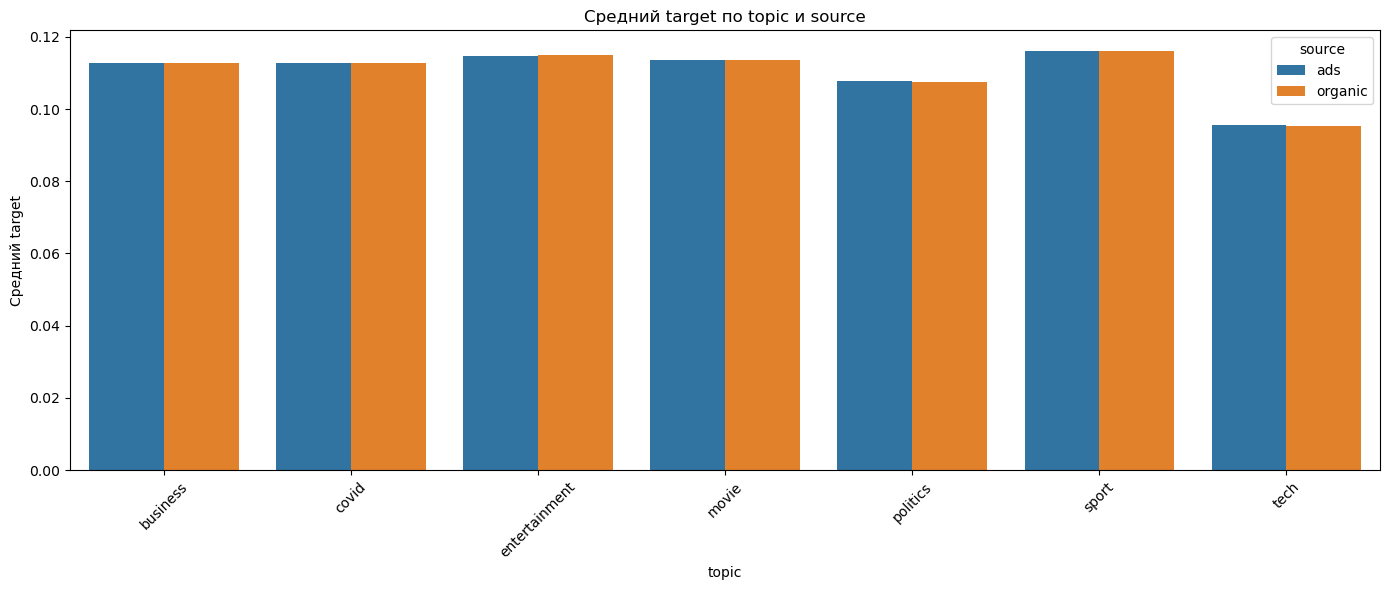

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='topic', y='target', hue='source')
plt.title('Средний target по topic и source')
plt.ylabel('Средний target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

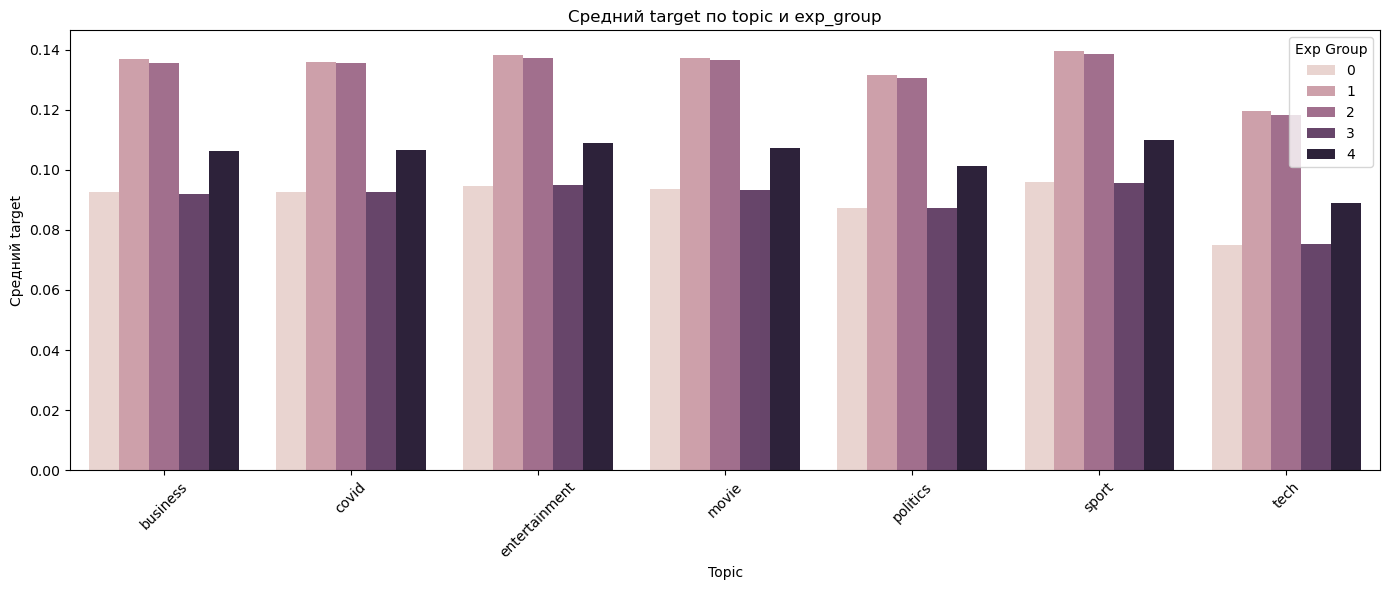

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Объединяем feed_data с user_data (exp_group)
df = df3.merge(df1[['user_id', 'exp_group']], on='user_id', how='inner')

# Добавляем topic из df2
df = df.merge(df2[['post_id', 'topic']], on='post_id', how='inner')

# Группируем по exp_group и topic, считаем средний таргет
grouped = df.groupby(['exp_group', 'topic'])['target'].mean().reset_index()

# Строим график
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='topic', y='target', hue='exp_group')
plt.title('Средний target по topic и exp_group')
plt.ylabel('Средний target')
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.legend(title='Exp Group')
plt.tight_layout()
plt.show()

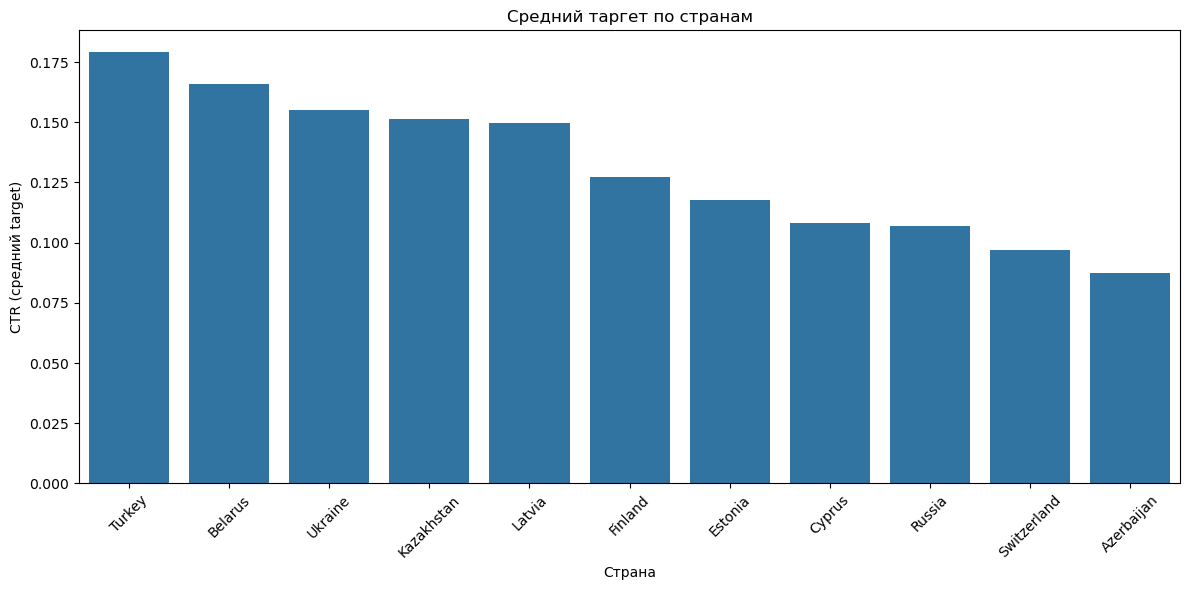

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пример объединения
merged_df = df3.merge(df1[['user_id', 'country']], on='user_id', how='left')

# Группируем и считаем средний таргет
country_target = merged_df.groupby('country')['target'].mean().reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=country_target.sort_values('target', ascending=False), x='country', y='target')
plt.xticks(rotation=45)
plt.title('Средний таргет по странам')
plt.ylabel('CTR (средний target)')
plt.xlabel('Страна')
plt.tight_layout()
plt.show()


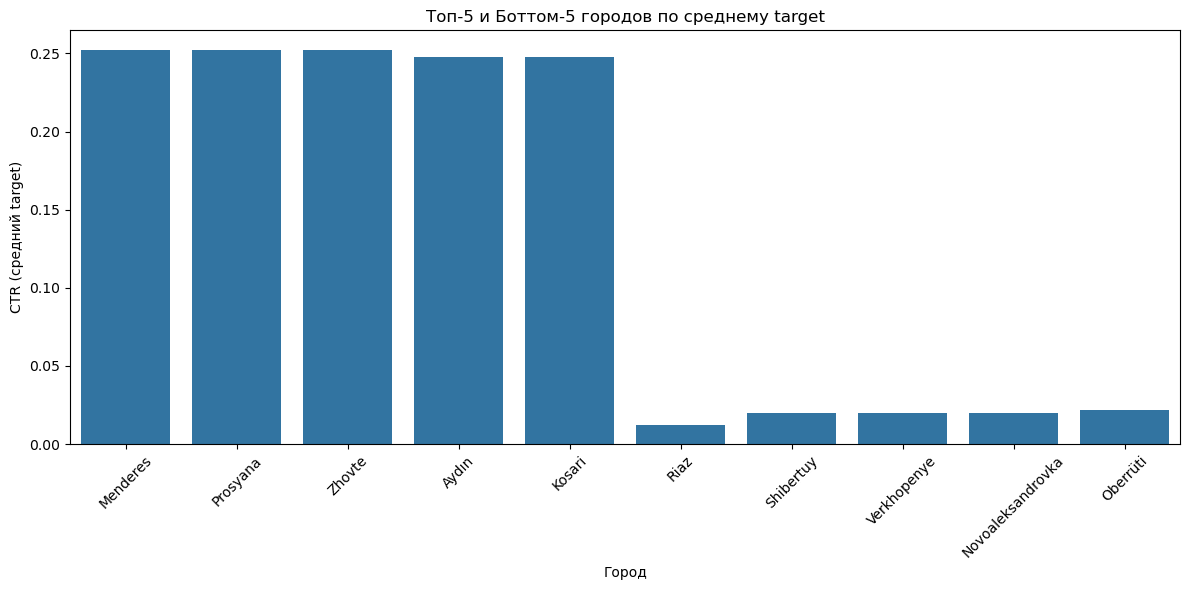

In [51]:
# Объединяем feed_data с user_data по user_id
merged_df = df3.merge(df1[['user_id', 'city']], on='user_id', how='left')

# Считаем средний target по городам
city_target = merged_df.groupby('city')['target'].mean().reset_index()

# Отбираем топ-5 и анти-топ-5
top5 = city_target.sort_values('target', ascending=False).head(5)
bottom5 = city_target.sort_values('target', ascending=True).head(5)

# Объединяем
final_df = pd.concat([top5, bottom5])

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df, x='city', y='target')
plt.xticks(rotation=45)
plt.title('Топ-5 и Боттом-5 городов по среднему target')
plt.ylabel('CTR (средний target)')
plt.xlabel('Город')
plt.tight_layout()
plt.show()


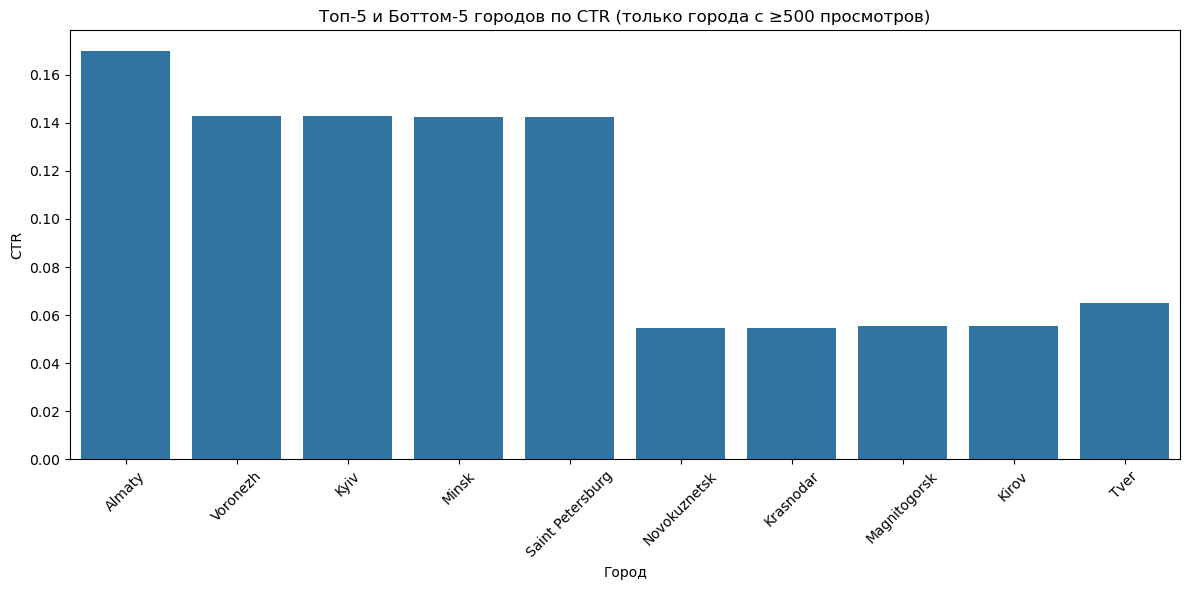

In [54]:
# Считаем общее число просмотров и средний target по городам
city_stats = merged_df.groupby('city').agg(
    views=('target', 'count'),
    ctr=('target', 'mean')
).reset_index()

# Оставляем только города с минимум 500 просмотрами
filtered = city_stats[city_stats['views'] >= 100000]

# Отбираем топ-5 и анти-топ-5
top5 = filtered.sort_values('ctr', ascending=False).head(5)
bottom5 = filtered.sort_values('ctr', ascending=True).head(5)

# Объединяем
final = pd.concat([top5, bottom5])

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=final, x='city', y='ctr')
plt.xticks(rotation=45)
plt.title('Топ-5 и Боттом-5 городов по CTR (только города с ≥500 просмотров)')
plt.ylabel('CTR')
plt.xlabel('Город')
plt.tight_layout()
plt.show()


In [ ]:
ohe = pd.get_dummies(df11['country'], drop_first=True)

In [ ]:
df_final = pd.concat([df11.drop('country', axis=1), ohe], axis=1)